# Linear Regression Example

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#downloading">Downloading</a></li>
        <li><a href="#pre-processing">Apply Regression</a></li>
        <li><a href="#visualization">Statistics Analysis</a></li>
    </ol>
</div>
<br>
<hr>

<h1><center> Download Data  <center></h1>

In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import seaborn as sns

PWM_Velocidade_df = pd.read_csv("http://raw.githubusercontent.com/ect-info/ml/master/dados/PWMxVelocidade.csv")

In [2]:
PWM_Velocidade_df.head()

,PWM,Velocidade
0,80,12.82
1,80,13.03
2,90,16.02
3,100,18.37
4,110,20.93


In [3]:
PWM_Velocidade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
PWM           43 non-null int64
Velocidade    43 non-null float64
dtypes: float64(1), int64(1)
memory usage: 768.0 bytes


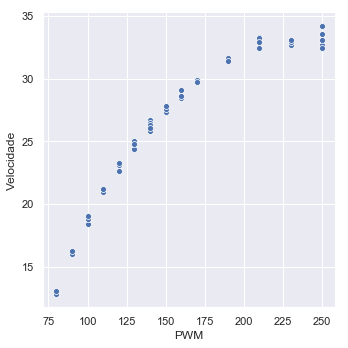

In [4]:
sns.set(style="darkgrid")
tips = PWM_Velocidade_df
sns.relplot(x="PWM", y="Velocidade", data=tips);

<h1><center> Apply Regression  <center></h1>
  

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
import numpy as np

# Split data set , test_size = 20%
train_set, test_set = train_test_split(PWM_Velocidade_df,test_size=0.2,random_state=42)
# X_train, X_test, y_train, y_tes = train_test_split(PWM_Velocidade_df['PWM'],PWM_Velocidade_df['Velocidade'],test_size=0.2,random_state=42)
# Inital Hiph = Linear relationship with Speed and PWM
# Apply a Linear regression
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train_set[['PWM']])
train_y = np.asanyarray(train_set[['Velocidade']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients %f \n: ' % regr.coef_)
print ('Intercept: %f \n' % regr.intercept_)

# Equation:
print("Equation \n")
print(" y = %f * x + %f"  % (regr.coef_,regr.intercept_))

Coefficients 0.107695 
: 
Intercept: 9.445588 

Equation 

 y = 0.107695 * x + 9.445588


C:\Users\sam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Train - Mean absolute error: 1.89
Train - Residual sum of squares (MSE): 4.91
Train - R2-score: 0.84


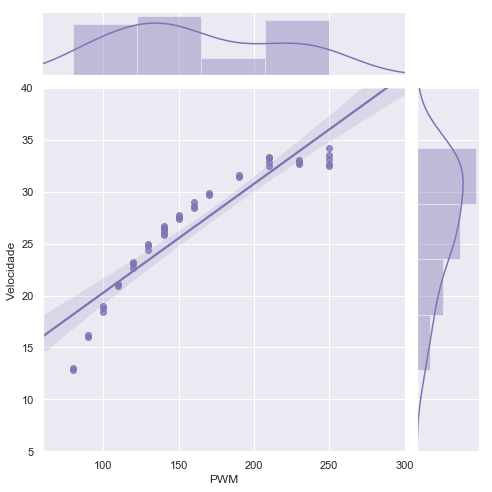

In [6]:
tips = PWM_Velocidade_df
g = sns.jointplot("PWM", "Velocidade", data=tips, kind="reg",
                  xlim=(60, 300), ylim=(5, 40), color="m", height=7)


train_y_hat = regr.predict(train_x)

print("Train - Mean absolute error: %.2f" % np.mean(np.absolute(train_y_hat - train_y)))
print("Train - Residual sum of squares (MSE): %.2f" % np.mean((train_y_hat - train_y) ** 2))
print("Train - R2-score: %.2f" % r2_score(train_y_hat , train_y) )

<h1><center> Statistics Analysis  <center></h1>

## Metrics:
* Sum of squared residuals: If the residuals are uncorrelated and normally distributed with mean 0 and constant variance, then the least squares fit is also the maximum likelihood estimator of inter e slop.

In [7]:
test_x = np.asanyarray(test_set[['PWM']])
test_y = np.asanyarray(test_set[['Velocidade']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 1.72
Residual sum of squares (MSE): 3.79
R2-score: 0.90


In [9]:
import statistics
sqe = np.mean((test_y_hat - test_y) ** 2)
n = len(test_y)
sqe = sqe / (n - 2)
print("Var = ",sqe)

Var =  0.5416414120656581


In [16]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(test_y,test_y_hat)

explained_variance:  0.8967
mean_squared_log_error:  0.0055
r2:  0.8874
MAE:  1.7218
MSE:  3.7915
RMSE:  1.9472


# Linear Regression Exercise

## Download train data

In [17]:
# download link: htttp://github.com/ect-info/ml/tree/master/dados
# horario002.txt

horario_df = pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/horario002.csv")
horario_df.head()

,pwm,pulses
0,0.50,127
1,0.52,133
2,0.54,137
3,0.56,140
4,0.58,143


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
pwm        25 non-null float64
 pulses    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


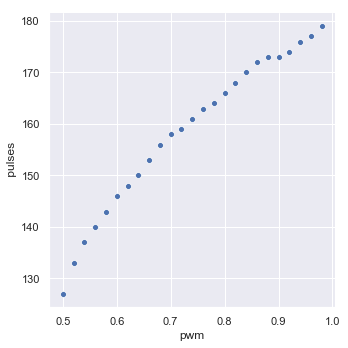

In [20]:
horario_df.info()
sns.set(style="darkgrid")
tips = horario_df
sns.relplot(x="pwm", y=" pulses", data=tips);

## Apply regression on train dataset

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
import numpy as np

regr = linear_model.LinearRegression()

train_x = np.asanyarray(horario_df[['pwm']])
train_y = np.asanyarray(horario_df[[' pulses']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients %f \n: ' % regr.coef_)
print ('Intercept: %f \n' % regr.intercept_)

# Equation:
print("Equation \n")
print(" y = %f * x + %f"  % (regr.coef_,regr.intercept_))

Coefficients 99.346154 
: 
Intercept: 85.123846 

Equation 

 y = 99.346154 * x + 85.123846


C:\Users\sam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Train - Mean absolute error: 2.21
Train - Residual sum of squares (MSE): 7.10
Train - R2-score: 0.97


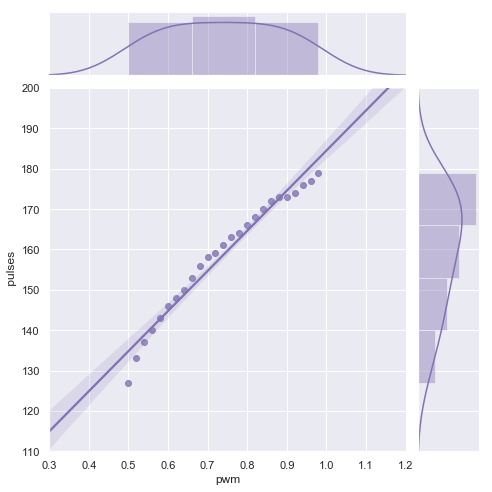

In [27]:
tips = horario_df
g = sns.jointplot("pwm", " pulses", data=tips, kind="reg",
                  xlim=(0.3, 1.2), ylim=(110, 200), color="m", height=7)


train_y_hat = regr.predict(train_x)

print("Train - Mean absolute error: %.2f" % np.mean(np.absolute(train_y_hat - train_y)))
print("Train - Residual sum of squares (MSE): %.2f" % np.mean((train_y_hat - train_y) ** 2))
print("Train - R2-score: %.2f" % r2_score(train_y_hat , train_y) )

## Evaluate on test dataset

In [29]:
horario_test_df = pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/horario003.csv")
horario_test_df.head()

,pwm,pulses
0,0.50,125
1,0.53,135
2,0.56,140
3,0.59,144
4,0.62,148


In [30]:
test_x = np.asanyarray(horario_test_df[['pwm']])
test_y = np.asanyarray(horario_test_df[[' pulses']])

In [31]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

test_y_hat = regr.predict(test_x)
regression_results(test_y,test_y_hat)

explained_variance:  0.9599
mean_squared_log_error:  0.0005
r2:  0.9559
MAE:  2.2571
MSE:  9.7745
RMSE:  3.1264


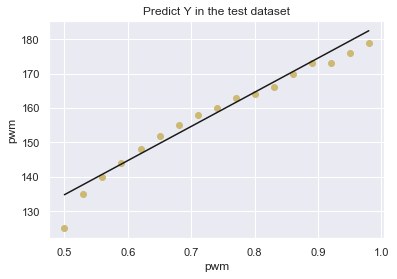

In [40]:
import matplotlib.pyplot as plt

plt.plot(test_x,test_y, 'yo', test_x, test_y_hat, '-k')
plt.title("Predict Y in the test dataset")
plt.xlabel("pwm")
plt.ylabel("pwm")
plt.show()
